In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


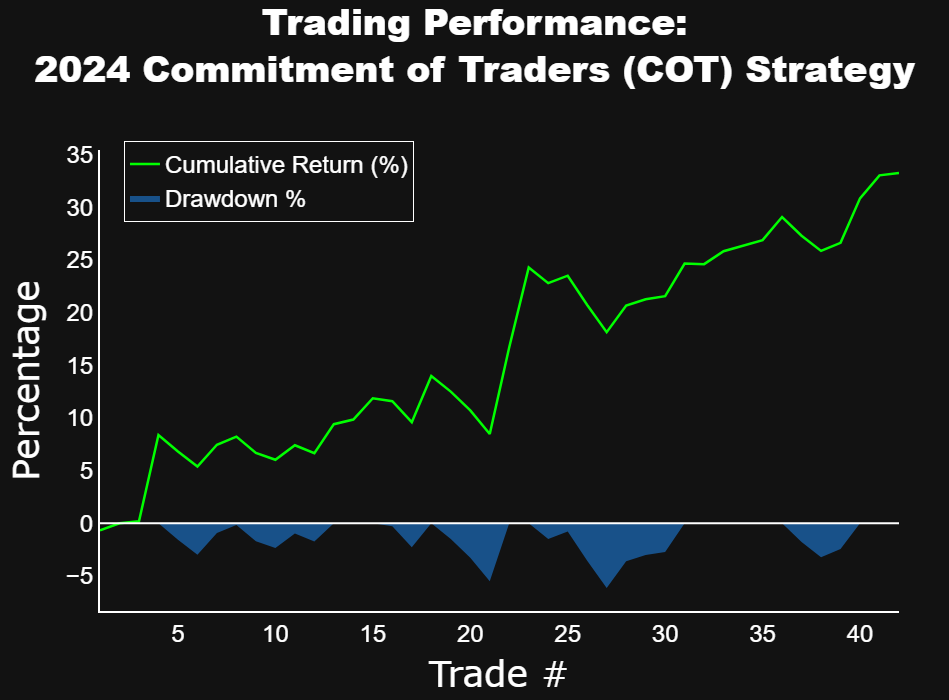

In [35]:
import pandas as pd
import plotly.graph_objects as go

# Define custom colors
background_color = "#121212"  # Dark mode background
equity_color = "#00FF00"  # Lime green for equity curve
drawdown_color = "#1E90FF"  # Blue for drawdown area
text_color = "#FFFFFF"  # White for labels, numbers, and borders
axis_line_color = "#FFFFFF"  # White axis lines

# Load the Excel file
file_path = r"C:\Users\joshc\CMR 2024 Returns.xlsx"  # Adjust path as needed
df = pd.read_excel(file_path)

# Calculate cumulative returns as percentage
df['Cumulative Return %'] = ((1 + df['Percent Return']).cumprod() - 1) * 100

# Calculate drawdown percentage (kept negative for positioning below x-axis)
df['Peak'] = df['Cumulative Return %'].cummax()
df['Drawdown %'] = df['Cumulative Return %'] - df['Peak']

# Create the figure with dark mode styling
fig = go.Figure()

# Add Cumulative Return (Above X-Axis)
fig.add_trace(go.Scatter(
    x=df['Trade #'], 
    y=df['Cumulative Return %'], 
    mode='lines', 
    name='Cumulative Return (%)',
    line=dict(color=equity_color, width=2.5),
    hovertemplate="%{y:.2f}"  # Removes Trade # from the Cumulative Return line
))

# Add Drawdown as a Full Mountain Area Chart (Below X-Axis)
fig.add_trace(go.Scatter(
    x=df['Trade #'], 
    y=df['Drawdown %'],  # This is already negative, so it will appear below the x-axis
    mode='lines', 
    name='Drawdown %',
    fill='tozeroy',  # Converts it into a mountain-style area chart
    line=dict(color=drawdown_color, width=0),  # No line, just fill
    hovertemplate="%{y:.2f}"  # Simplified hover info, only value
))

# Find chart boundaries for annotation placement
y_max = df['Cumulative Return %'].max() * 0.9  # 90% of the highest value
y_min = df['Drawdown %'].min() * 1.1  # 110% of the lowest value

# Adjustments for title and legend placement
fig.update_layout(
    title=dict(
        text="Trading Performance:<br>2024 Commitment of Traders (COT) Strategy",
        font=dict(family="Arial Black", size=36, color=text_color),  # Same size as axes
        x=0.5,  # Centers the title
        xanchor="center",
        y=0.95  # Moves title slightly down to prevent cutoff
    ),
    xaxis=dict(
        title="Trade #",
        title_font=dict(size=36, color=text_color),  # Larger & white axis title
        tickfont=dict(family="Arial", size=24, color=text_color),  # Doubled font size
        showgrid=False,  # Removes x-axis grid
        zeroline=False,  # Removes zero reference line
        showline=True,  # Shows the axis line
        linecolor=axis_line_color,  # White axis line
        linewidth=2
    ),
    yaxis=dict(
        title="Percentage",
        title_font=dict(size=36, color=text_color),  # Larger y-axis title
        tickfont=dict(family="Arial", size=24, color=text_color),  # Doubled font size
        showgrid=False,  # Removes y-axis grid
        zeroline=False,  # Removes zero reference line
        showline=True,  # Shows the axis line
        linecolor=axis_line_color,  # White axis line
        linewidth=2
    ),
    shapes=[
        # White horizontal line at y=0
        dict(
            type="line",
            xref="paper", yref="y",
            x0=0, x1=1, y0=0, y1=0,  # Line spans entire x-axis
            line=dict(color="white", width=2)  # White line
        )
    ],
    plot_bgcolor=background_color,  # Dark background
    paper_bgcolor=background_color,  # Dark background
    hovermode="x unified",  # Enables a single crosshair for both traces
    height=700, 
    width=1000,
    margin=dict(l=100, r=50, t=150, b=80),  # Adjusted top margin to prevent overlap
    legend=dict(
        font=dict(family="Arial", size=24, color=text_color),  # Doubled font size
        bgcolor=background_color,
        bordercolor=text_color,
        borderwidth=1,
        yanchor="top",  # Aligns legend to match top of Y-axis white line
        y=1.02,  # Moves legend slightly down
        xanchor="left",
        x=0.03  # Keeps legend near the Y-axis
    )
)
# At the very end:
fig.write_html("index.html")  # Save as interactive HTML
fig.show()  # Show locally

